In [11]:
import pandas as pd
import requests
from io import BytesIO
from PIL import Image
import os, ast
import numpy as np
import random
import math
import pickle
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

In [5]:
df = pd.read_csv("tweets.csv")
df1 = pd.read_csv("quora_tony.csv")

In [6]:
df.head()

,Id,Date,Url,Full Text,Hashtags,Views Count,Favourite Count,Retweet Count,Reply Count,Language,Image Urls,Video Urls,User Mentions,User Profile Id,User Description,User Name,User Followers Count
0,1780971176338342386,Thu Apr 18 14:46:31 +0000 2024,https://twitter.com/iitgn/status/1780971176338...,Read more about the research here: https://t.c...,"['IITGNPostdocTimes', 'IITGNPostdocs']",175,2,1,0,en,[],[],[],234559391,The official Twitter account of Indian Institu...,iitgn,48051
1,1777245988111208617,Mon Apr 08 08:03:57 +0000 2024,https://twitter.com/DivyaKumar182/status/17772...,As I complete my Ramalingaswami Re-entry Fello...,[],7303,100,1,4,en,['https://pbs.twimg.com/media/GKoLzW_WsAAWAy7....,[],[],1199925015631650816,Asst. Prof| PI: Liver Metabolism & Diseases Gr...,DivyaKumar182,3825
2,1760545579468255312,Thu Feb 22 06:02:30 +0000 2024,https://twitter.com/DBTIndia/status/1760545579...,@DBTIndia Ramalingaswami Re-entry fellowship (...,[],2678,17,9,0,en,[],['https://video.twimg.com/ext_tw_video/1760545...,"['DBTIndia', 'IITHyderabad', 'DrJitendraSingh'...",1243467265,"The Department of Biotechnology, Ministry of S...",DBTIndia,105122
3,1758927476070166544,Sat Feb 17 18:52:44 +0000 2024,https://twitter.com/Sci_ROI/status/17589274760...,The last date for the submission of the presti...,[],788,2,3,1,en,[],[],[],787969920185298944,Gateway for Indian researchers across the glob...,Sci_ROI,2262
4,1758441740585914692,Fri Feb 16 10:42:35 +0000 2024,https://twitter.com/unescorcb/status/175844174...,Kind Attention: The last date for submission o...,[],3427,28,20,0,en,[],[],[],2509381254,Regional Centre for Biotechnology\nA UNESCO Ca...,unescorcb,7258


In [7]:
df1.head()

,Id,Date,Url,Title,Full Text,Type,Upvotes Count,Views Count,Shares Count,Comments Count,Image Urls,Video Urls,User Id,User name
0,80644619,2018-04-22T14:22:30.637110Z,https://www.quora.com/What-are-some-prominent-...,What are some prominent examples of Indian bra...,"Brain Drain Brain Drain is a economic term, wh...",answer,1,3091,0,0,['https://qph.cf2.quoracdn.net/main-qimg-aa368...,[],168640941,MayurDhokchaule
1,1477743656698452,2023-04-04T05:20:01.164844Z,https://www.quora.com/What-are-some-fellowship...,What are some fellowships for research availab...,1. Khorana Program for Scholars 2. Fulbright F...,answer,0,49,0,0,[],[],233280385,The Google Bot
2,8309576,2020-09-23T09:42:45.997903Z,https://generalknowledgelive.quora.com/Schemes...,Schemes for Indian researchers residing in for...,Schemes for Indian researchers residing in for...,post,0,958,2,0,[],[],1292556795,ShivPrasad
3,137017811,2023-11-26T08:03:07.711494Z,https://azeezunv.quora.com/The-significance-of...,The significance of Fellowships in research an...,The significance of Fellowships in research an...,post,0,15,0,0,['https://qph.cf2.quoracdn.net/main-qimg-2168b...,[],506976693,Azeez


In [8]:
df.columns

Index(['Id', 'Date', 'Url', 'Full Text', 'Hashtags', 'Views Count',
       'Favourite Count', 'Retweet Count', 'Reply Count', 'Language',
       'Image Urls', 'Video Urls', 'User Mentions', 'User Profile Id',
       'User Description', 'User Name', 'User Followers Count'],
      dtype='object')

In [9]:
df1.columns

Index(['Id', 'Date', 'Url', 'Title', 'Full Text', 'Type', 'Upvotes Count',
       'Views Count', 'Shares Count', 'Comments Count', 'Image Urls',
       'Video Urls', 'User Id', 'User name'],
      dtype='object')

In [25]:
df.shape

(20, 17)

In [27]:
df1.shape

(4, 14)

## EDA 

In [12]:
import matplotlib.pyplot as plt

In [7]:
df['Retweet Count'].unique()

array([ 9,  3, 20,  0,  6,  1,  5, 16, 21,  2])

In [21]:
df['Retweet Count'].value_counts()

Retweet Count
0     8
6     3
3     2
9     1
20    1
1     1
5     1
16    1
21    1
2     1
Name: count, dtype: int64

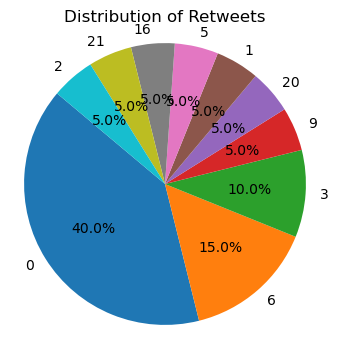

In [14]:
type_counts = df['Retweet Count'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(4,4))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Retweets')
plt.axis('equal') 
plt.show()

In [8]:
df['Reply Count'].unique()

array([0, 1, 2])

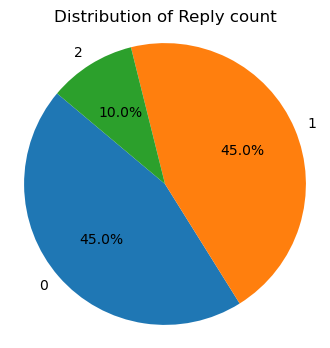

In [15]:
type_counts = df['Reply Count'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(4,4))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Reply count')
plt.axis('equal') 
plt.show()

In [9]:
df1['Upvotes Count'].unique()

array([1, 0])

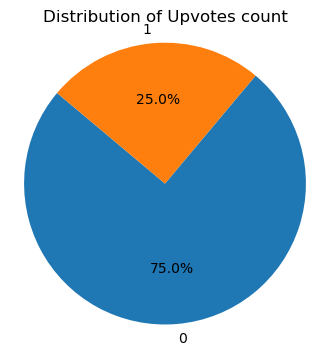

In [16]:
type_counts = df1['Upvotes Count'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(4,4))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Upvotes count')
plt.axis('equal') 
plt.show()

In [11]:
df1['Shares Count'].unique()

array([0, 2])

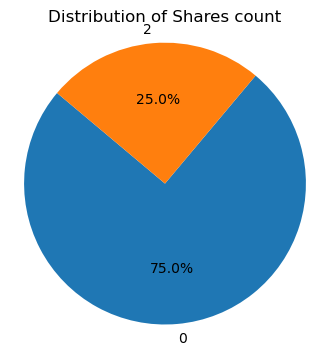

In [18]:
type_counts = df1['Shares Count'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(4,4))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Shares count')
plt.axis('equal') 
plt.show()

In [19]:
df.isnull().sum()

Id                      0
Date                    0
Url                     0
Full Text               0
Hashtags                0
Views Count             0
Favourite Count         0
Retweet Count           0
Reply Count             0
Language                0
Image Urls              0
Video Urls              0
User Mentions           0
User Profile Id         0
User Description        0
User Name               0
User Followers Count    0
dtype: int64

In [20]:
df1.isnull().sum()

Id                0
Date              0
Url               0
Title             0
Full Text         0
Type              0
Upvotes Count     0
Views Count       0
Shares Count      0
Comments Count    0
Image Urls        0
Video Urls        0
User Id           0
User name         0
dtype: int64

## SENTIMENT ANALYSIS

In [2]:
import csv
import nltk

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    print('\n')
    print("Original Text:", text)

    # Lowercasing
    text = text.lower()
    print("Lower Text:", text)

    # Tokenization
    tokens = word_tokenize(text)
    print("Tokenized Text:", tokens)

    # Removing punctuation
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    print("Text without Punctuation:", tokens)

    # Removing stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    print("Text without Stopwords:", tokens)

    # Stemming
    porter = PorterStemmer()
    tokens = [porter.stem(word) for word in tokens]
    print("Stemmed Text:", tokens)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    print("Lemmatized Text:", tokens)

    return tokens

[nltk_data] Downloading package punkt to /Users/riya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/riya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/riya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
# Get the Full Text
text = df['Full Text'].tolist()

# Preprocess the Full Text
preprocessed_tweets = [preprocess_text(text) for text in text]



Original Text: Read more about the research here: https://t.co/NJniLK2R5i.
The research was supported by the DBT Ramalingaswami Re-entry Fellowship Grant and IITGN’s start-up grant. You can read more about Dr Gawande’s research here: https://t.co/h0AYKEA6jK
#IITGNPostdocTimes #IITGNPostdocs
Lower Text: read more about the research here: https://t.co/njnilk2r5i.
the research was supported by the dbt ramalingaswami re-entry fellowship grant and iitgn’s start-up grant. you can read more about dr gawande’s research here: https://t.co/h0aykea6jk
#iitgnpostdoctimes #iitgnpostdocs
Tokenized Text: ['read', 'more', 'about', 'the', 'research', 'here', ':', 'https', ':', '//t.co/njnilk2r5i', '.', 'the', 'research', 'was', 'supported', 'by', 'the', 'dbt', 'ramalingaswami', 're-entry', 'fellowship', 'grant', 'and', 'iitgn', '’', 's', 'start-up', 'grant', '.', 'you', 'can', 'read', 'more', 'about', 'dr', 'gawande', '’', 's', 'research', 'here', ':', 'https', ':', '//t.co/h0aykea6jk', '#', 'iitgnpo

In [13]:
# Get the Full Text
text = df1['Full Text'].tolist()

# Preprocess the Full Text
preprocessed_quora = [preprocess_text(text) for text in text]



Original Text: Brain Drain Brain Drain is a economic term, where educated people of any country working in another country coming back to work in their home country . Over 1,000 Indian scientists working abroad have returned to India in the last two-three years, said Ministry for Science & Technology and Earth Sciences According to Department of Science &Tech, number of Indian scientist working internationally &returning to India showed 70 percent jump between 2012 &2017. Example- Shahrukh Khan In Swadesh Movie. Reasons for Brain Gain: - This has been primarily due to schemes such as Ramanujan Fellowship Scheme, Innovation in Science Pursuit for Inspired Research (INSPIRE) Faculty Scheme and the Ramalingaswami re-entry fellowship scheme. The launch of IPR Policy in 2016 has set a pace to resolve the IPR issues related to R&D in India. India is rapidly becoming a global design and developmental hub. Thousands of companies from around world have set up their R&D centres in India. Chang

In [28]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/riya/nltk_data...


True

In [29]:
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to classify sentiment using VADER
def analyze_sentiment_vader(text):
    # Get polarity scores
    scores = sid.polarity_scores(text)
    # Classify sentiment based on compound score
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = ''

# Iterate through each row in the DataFrame
for i in range(len(df)):
    # Analyze sentiment for the 'Full Text' column
    text = df['Full Text'][i]
    sentiment = analyze_sentiment_vader(text)
    # Store the sentiment in the 'Sentiment' column
    df.at[i, 'Sentiment'] = sentiment

In [30]:
df.head()

,Id,Date,Url,Full Text,Hashtags,Views Count,Favourite Count,Retweet Count,Reply Count,Language,Image Urls,Video Urls,User Mentions,User Profile Id,User Description,User Name,User Followers Count,Sentiment
0,1780971176338342386,Thu Apr 18 14:46:31 +0000 2024,https://twitter.com/iitgn/status/1780971176338...,Read more about the research here: https://t.c...,"['IITGNPostdocTimes', 'IITGNPostdocs']",175,2,1,0,en,[],[],[],234559391,The official Twitter account of Indian Institu...,iitgn,48051,Positive
1,1777245988111208617,Mon Apr 08 08:03:57 +0000 2024,https://twitter.com/DivyaKumar182/status/17772...,As I complete my Ramalingaswami Re-entry Fello...,[],7303,100,1,4,en,['https://pbs.twimg.com/media/GKoLzW_WsAAWAy7....,[],[],1199925015631650816,Asst. Prof| PI: Liver Metabolism & Diseases Gr...,DivyaKumar182,3825,Positive
2,1760545579468255312,Thu Feb 22 06:02:30 +0000 2024,https://twitter.com/DBTIndia/status/1760545579...,@DBTIndia Ramalingaswami Re-entry fellowship (...,[],2678,17,9,0,en,[],['https://video.twimg.com/ext_tw_video/1760545...,"['DBTIndia', 'IITHyderabad', 'DrJitendraSingh'...",1243467265,"The Department of Biotechnology, Ministry of S...",DBTIndia,105122,Positive
3,1758927476070166544,Sat Feb 17 18:52:44 +0000 2024,https://twitter.com/Sci_ROI/status/17589274760...,The last date for the submission of the presti...,[],788,2,3,1,en,[],[],[],787969920185298944,Gateway for Indian researchers across the glob...,Sci_ROI,2262,Neutral
4,1758441740585914692,Fri Feb 16 10:42:35 +0000 2024,https://twitter.com/unescorcb/status/175844174...,Kind Attention: The last date for submission o...,[],3427,28,20,0,en,[],[],[],2509381254,Regional Centre for Biotechnology\nA UNESCO Ca...,unescorcb,7258,Positive


In [16]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import torch
from transformers import BertTokenizer, BertForSequenceClassification, pipeline
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load sentiment analysis pipeline
classifier = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Function to analyze sentiment using VADER
def analyze_sentiment_vader(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 2  # Positive
    elif scores['compound'] <= -0.05:
        return 0  # Negative
    else:
        return 1  # Neutral


# Function to predict sentiment using BERT
def predict_sentiment_bert(text):
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt")
    outputs = model(**inputs)
    predicted_class = torch.argmax(outputs.logits, dim=1).item()
    return predicted_class

# Function to predict sentiment using RNN
def predict_sentiment_rnn(text):
    sequences = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    prediction = model_rnn.predict(padded)
    return int(round(prediction[0][0]))

# Function to predict sentiment using Transformers pipeline
def get_sentiment_transformer(text):
    # Split text into chunks of 512 characters
    n = 512
    chunks = [text[i:i+n] for i in range(0, len(text), n)]
    sentiments = [classifier(chunk)[0] for chunk in chunks]
    # Average sentiment scores (simple majority vote)
    positive_count = sum(1 for sentiment in sentiments if sentiment['label'] == 'POSITIVE')
    return 2 if positive_count > len(sentiments) / 2 else 0

# Create sentiment column for Quora dataset
df1['sentiment_vader'] = df1['Full Text'].apply(analyze_sentiment_vader)
df1['sentiment_bert'] = df1['Full Text'].apply(predict_sentiment_bert)
df1['sentiment_transformer'] = df1['Full Text'].apply(get_sentiment_transformer)

# Create sentiment column for Tweets dataset
df['sentiment_vader'] = df['Full Text'].apply(analyze_sentiment_vader)
df['sentiment_bert'] = df['Full Text'].apply(predict_sentiment_bert)
df['sentiment_transformer'] = df['Full Text'].apply(get_sentiment_transformer)

/Users/riya/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/riya/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [17]:
df.head()

,Id,Date,Url,Full Text,Hashtags,Views Count,Favourite Count,Retweet Count,Reply Count,Language,Image Urls,Video Urls,User Mentions,User Profile Id,User Description,User Name,User Followers Count,sentiment_vader,sentiment_bert,sentiment_transformer
0,1780971176338342386,Thu Apr 18 14:46:31 +0000 2024,https://twitter.com/iitgn/status/1780971176338...,Read more about the research here: https://t.c...,"['IITGNPostdocTimes', 'IITGNPostdocs']",175,2,1,0,en,[],[],[],234559391,The official Twitter account of Indian Institu...,iitgn,48051,2,0,2
1,1777245988111208617,Mon Apr 08 08:03:57 +0000 2024,https://twitter.com/DivyaKumar182/status/17772...,As I complete my Ramalingaswami Re-entry Fello...,[],7303,100,1,4,en,['https://pbs.twimg.com/media/GKoLzW_WsAAWAy7....,[],[],1199925015631650816,Asst. Prof| PI: Liver Metabolism & Diseases Gr...,DivyaKumar182,3825,2,0,2
2,1760545579468255312,Thu Feb 22 06:02:30 +0000 2024,https://twitter.com/DBTIndia/status/1760545579...,@DBTIndia Ramalingaswami Re-entry fellowship (...,[],2678,17,9,0,en,[],['https://video.twimg.com/ext_tw_video/1760545...,"['DBTIndia', 'IITHyderabad', 'DrJitendraSingh'...",1243467265,"The Department of Biotechnology, Ministry of S...",DBTIndia,105122,2,0,2
3,1758927476070166544,Sat Feb 17 18:52:44 +0000 2024,https://twitter.com/Sci_ROI/status/17589274760...,The last date for the submission of the presti...,[],788,2,3,1,en,[],[],[],787969920185298944,Gateway for Indian researchers across the glob...,Sci_ROI,2262,1,1,0
4,1758441740585914692,Fri Feb 16 10:42:35 +0000 2024,https://twitter.com/unescorcb/status/175844174...,Kind Attention: The last date for submission o...,[],3427,28,20,0,en,[],[],[],2509381254,Regional Centre for Biotechnology\nA UNESCO Ca...,unescorcb,7258,2,1,0


In [18]:
df1.head()

,Id,Date,Url,Title,Full Text,Type,Upvotes Count,Views Count,Shares Count,Comments Count,Image Urls,Video Urls,User Id,User name,sentiment_vader,sentiment_bert,sentiment_transformer
0,80644619,2018-04-22T14:22:30.637110Z,https://www.quora.com/What-are-some-prominent-...,What are some prominent examples of Indian bra...,"Brain Drain Brain Drain is a economic term, wh...",answer,1,3091,0,0,['https://qph.cf2.quoracdn.net/main-qimg-aa368...,[],168640941,MayurDhokchaule,2,0,0
1,1477743656698452,2023-04-04T05:20:01.164844Z,https://www.quora.com/What-are-some-fellowship...,What are some fellowships for research availab...,1. Khorana Program for Scholars 2. Fulbright F...,answer,0,49,0,0,[],[],233280385,The Google Bot,2,0,2
2,8309576,2020-09-23T09:42:45.997903Z,https://generalknowledgelive.quora.com/Schemes...,Schemes for Indian researchers residing in for...,Schemes for Indian researchers residing in for...,post,0,958,2,0,[],[],1292556795,ShivPrasad,2,0,2
3,137017811,2023-11-26T08:03:07.711494Z,https://azeezunv.quora.com/The-significance-of...,The significance of Fellowships in research an...,The significance of Fellowships in research an...,post,0,15,0,0,['https://qph.cf2.quoracdn.net/main-qimg-2168b...,[],506976693,Azeez,2,0,2


In [19]:
df.to_csv("tweets_sentiment.csv", index=False)
df1.to_csv("quora_sentiment.csv", index=False)